# $\rho-T$ diagram for helium core burning stars 

Figure 8.7 from *Stellar Structure & Evolution* by Pinsonneault & Ryden, Cambridge University Press.

Plot of temperature versus density within stellar models that have started core helium burning. Models are
computed for masses of 1, 3, 10, and 30 M<sub>sun</sub>. We also plot temperature versus density for
1 and 3 M<sub>sun</sub> red giants at core helium ignition. The central temperature and density at the
zero-age main sequence (ZAMS) and zero-age helium burning (ZAHB) phases are plotted.

Data are from models computed using MESA (http://mesa.sourceforge.net).

In [1]:
import os
import sys
import math
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=DeprecationWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig8_7.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Data Files

Data are density ($\rho$) and temperature for stars of masses 1,3,10, and 30 M<sub>sun</sub> on the zero-age
helium burning (zahb) sequence, at helium core ignition for 1 and 3M<sub>sun</sub>, and the cores of
zero-age main sequences (zams) and zero-age helium burning (zahb). These are extracted in CSV format from
the output of MESA models.

The CSV file reading is tricky as to pack all this into one CSV, each pair of density and temperature for
each data set has different numbers of rows.  The pandas read_csv() format reads in everything up to the
maximum number of rows across all data, and then fills in blanks as NaNs (not-a-number).  The "trick" here
is to use the numpy.isfinite() method to restrict attention to the non-blank (non-NaN) data in each vector.

Line type list `ltypes` is the same as the $\rho-T$ diagrams for the ZAMS in Figure 6.8.


In [3]:
dataDir = 'ZAHB'

dataFile = f'{dataDir}/He_rhoT_zahb.csv'

data = pd.read_csv(dataFile)

T = {}
rho = {}

zahbList = ['1','3','10','30']
ltypes = [(0,()),(0,(10,2)),(0, (3, 5, 1, 5)),(0,(4,2))]
heIgList = ['1','3']
stageList = ['zams','zahb']

# zero-age helium burning rho-T data

for mass in zahbList:
    lgT = np.array(data[f'logT_{mass}_zahb'])
    lgrho = np.array(data[f'logrho_{mass}_zahb'])
    
    T[mass] = 10.0**lgT[np.isfinite(lgT)]
    rho[mass] = 10.0**lgrho[np.isfinite(lgrho)]

# helium core ignition data

for mass in heIgList:
    lgT = np.array(data[f'logT_{mass}_heignite'])
    lgrho = np.array(data[f'logrho_{mass}_heignite'])
    
    key = f'He{mass}Msun'
    
    T[key] = 10.0**lgT[np.isfinite(lgT)]
    rho[key] = 10.0**lgrho[np.isfinite(lgrho)]

# zams and zahb core rho-T data

for stage in stageList:
    lgT = np.array(data[f'logT_{stage}'])
    lgrho = np.array(data[f'logrho_{stage}'])
    
    T[stage] = 10.0**lgT[np.isfinite(lgT)]
    rho[stage] = 10.0**lgrho[np.isfinite(lgrho)]


### Plotting limits

Set these by hand. Because the density axis spans 17 orders of magnitude, we only label every other major tick, but
all ticks on the Y axis.  I'm sure there is some slick, pythonic way to code this, but sometimes doing it by hand
is just a lot easier.

In [4]:
# Density limits

xMin = 1.0e-10 # density in g/cm^3
xMax = 1.0e7

# x-axis ticks every other log interval

xticks = [1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,0.001,0.01,0.1,1,10,100,1000,1e4,1e5,1e6,1e7]
xticklabels = [r'10$^{-10}$','',r'10$^{-8}$','',r'10$^{-6}$','',r'10$^{-4}$','',r'10$^{-2}$','','1',
               '',r'10$^{2}$','',r'10$^{4}$','',r'10$^{6}$','']
    
# Temperature Limits

yMin = 1000. # temperature in K
yMax = 1.0e9


## Figure 8.7

Plot one panel, log-log axes, with different line types (see also Figure 6.8):
 * 1 Msun - solid line
 * 3 Msun - long-dashed line
 * 10 Msun - dash-dot line
 * 30 Msun - short-dashed line

$\rho-T$ plot colors
 * black - zero-age helium burning sequence
 * gray - core helium ignition (1 and 3Msun only)
 
Also plot contours of $\rho-T$ for the cores of zero-age main sequence (ZAMS) and zero-age helium burning (ZAHB)
phases.

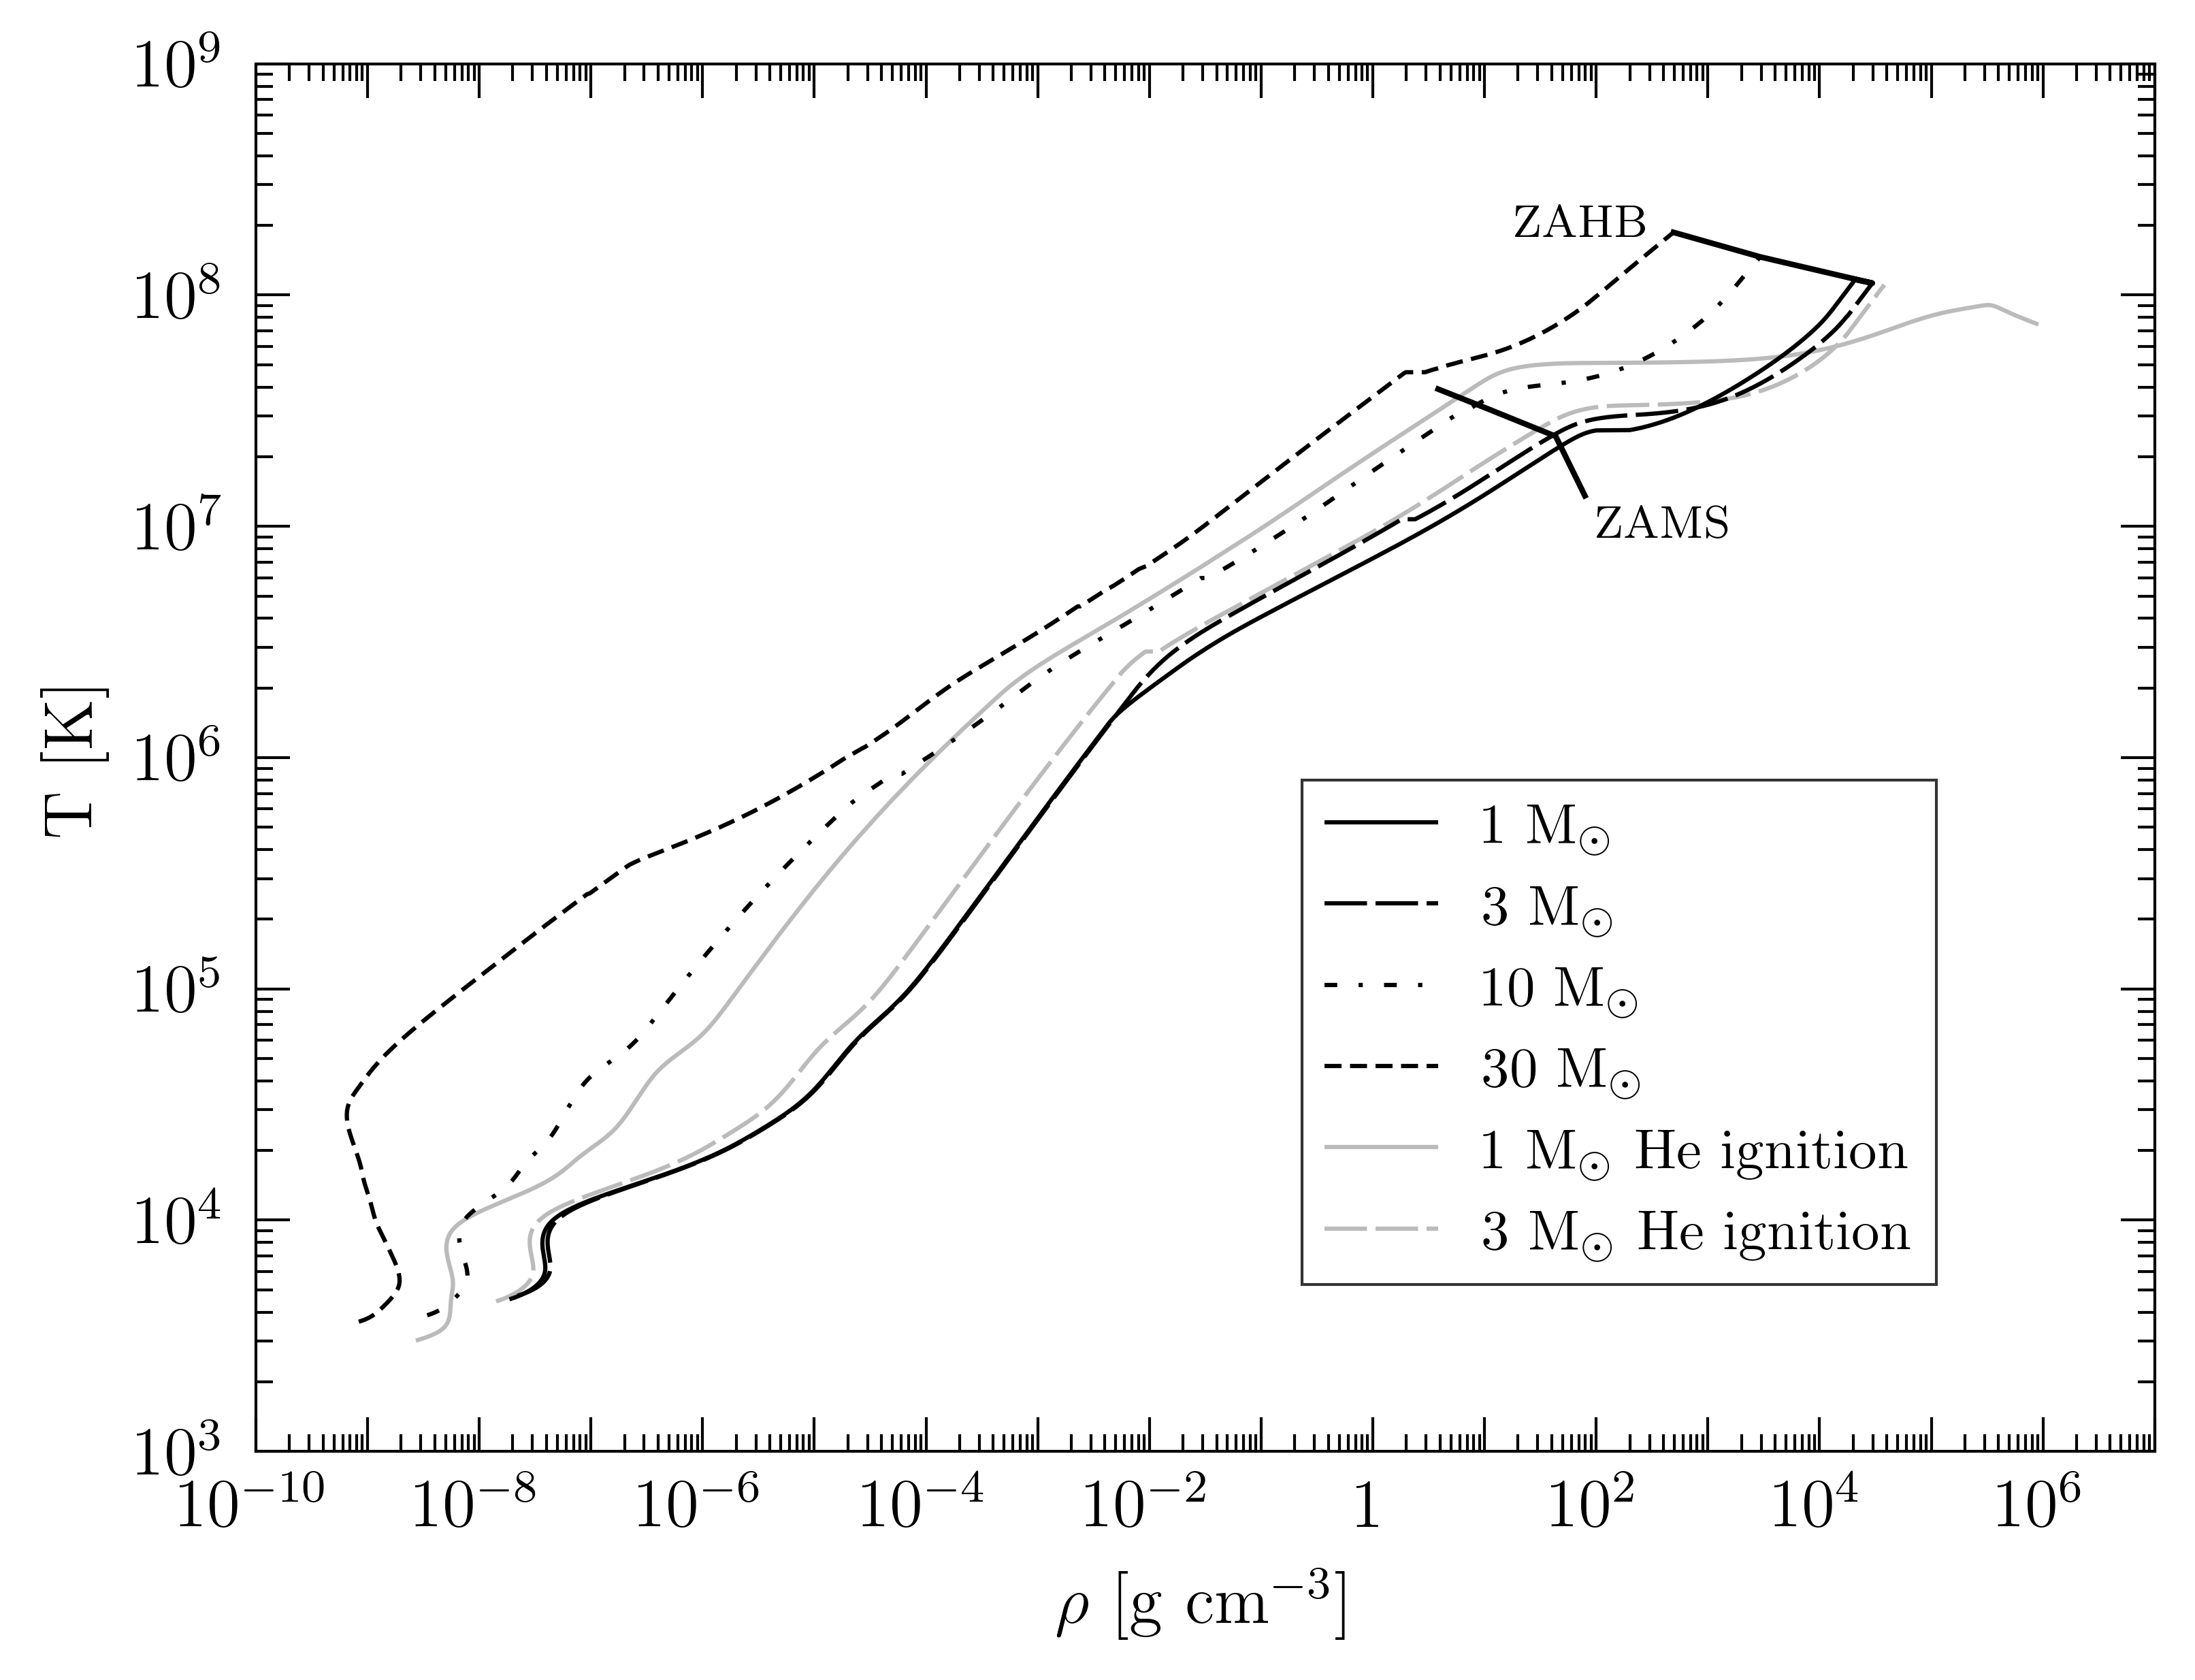

In [5]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)
    
ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

ax.set_xlim(xMin,xMax)
ax.set_xscale('log')
ax.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax.xaxis.set_minor_formatter(NullFormatter())

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_xlabel(r'$\rho$ [g cm$^{-3}$]',fontsize=axisFontSize)

ax.set_ylim(yMin,yMax)
ax.set_yscale('log')
ax.set_ylabel(r'T [K]',fontsize=axisFontSize)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top=True,right=True)
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top=True,right=True)

# ZAHB rho-T

for i in range(len(zahbList)):
    mass = zahbList[i]
    ax.plot(rho[mass],T[mass],ls=ltypes[i],color='black',lw=0.75,label=rf'{mass} M$_\odot$',zorder=9)
    
for i in range(len(heIgList)):
    key = f'He{heIgList[i]}Msun'
    ax.plot(rho[key],T[key],ls=ltypes[i],color='#bbbbbb',lw=0.75,label=rf'{heIgList[i]} M$_\odot$ He ignition',
           zorder=6)

for stage in stageList:
    ax.plot(rho[stage],T[stage],ls='-',color='black',lw=1,zorder=10)
    
ax.text(300,2e8,'ZAHB',ha='right',va='center',fontsize=labelFontSize)
ax.text(100,1e7,'ZAMS',ha='left',va='center',fontsize=labelFontSize)

legend = ax.legend(fontsize=10,loc='lower right',fancybox=False,edgecolor='black',bbox_to_anchor=(0.9,0.1))
frame = legend.get_frame()
frame.set_linewidth(0.5)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')